In [1]:
#%% importing stuff
import Arm2DEnv as ae
import numpy as np
from arm_params import *
from utils import plot_arm
from imp_cntrl import imp_cntrl

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
#%% load controler
from stable_baselines import SAC, DDPG
#cntrl = SAC.load("twolink-arm-sac")
cntrl = DDPG.load("../best_model.zip")

Loading a model without an environment, this model cannot be trained until it has a valid environment.




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






In [16]:
#%% arm dynamics and reward function
t = 0.9 # second
tstep = round(t/dt)

env = ae.ArmModel()
x0 = env.reset()
x = np.copy(x0)
X = []
C = []
for step in range(tstep):
    u = cntrl.predict(x)[0] #imp_cntrl(step*dt, x, t, env) #
    x_next,c,done,info = env.step(u)
    X.append(x)
    C.append(c)

    if done:
        break
    else:
        x = np.copy(x_next)


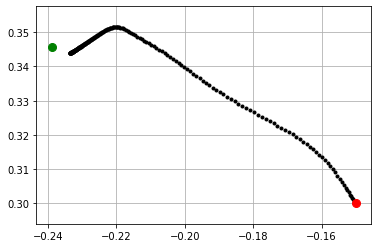

In [17]:
#%% plot trajectory

import matplotlib.pyplot as plt
from utils import Joint2Hand

hand = np.apply_along_axis(Joint2Hand, 1, np.array(X), 'lower','pos', 'vel')

plt.plot(hand[:,0], hand[:,1],'k.')
plt.plot(env.origin_hand[0], env.origin_hand[1], marker='o', markersize=8, color="red")
plt.plot(env.target_hand[0], env.target_hand[1], marker='o', markersize=8, color="green")

plt.axis('equal')
plt.grid()
plt.show()


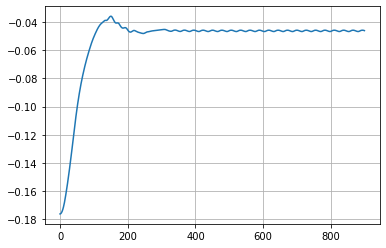

In [19]:
#%% plot cost
plt.plot(C)
plt.grid()
plt.show()

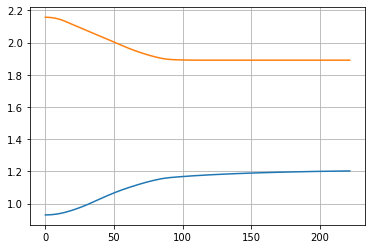

In [18]:
# %% plot joint states
joint = np.vstack(X)
plt.plot(joint[:,0])
plt.plot(joint[:,1])

plt.grid()
plt.show()


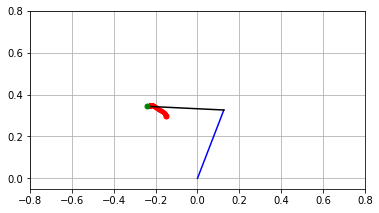

In [19]:
# %% plot arm motion
#%matplotlib qt
plot_arm(X, env, False)